# Assignment-15-Random-Forest (Fraud Check)

In [1]:
# Importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing Data

In [4]:
df= pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
print('No. of observations:{}\nNo. of features:{}'.format(df.shape[0],df.shape[1]))

No. of observations:600
No. of features:6


In [6]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
df.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


<Axes: >

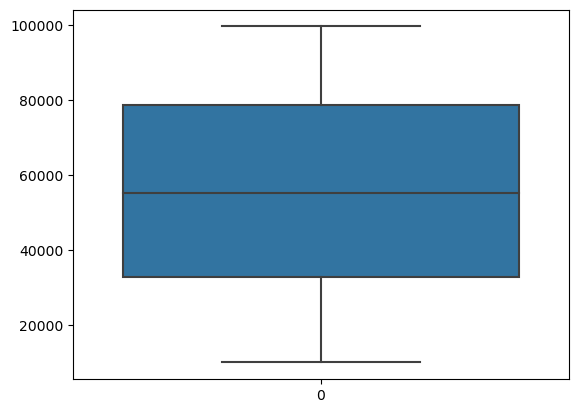

In [9]:
sns.boxplot(df['Taxable.Income'])

In [10]:
df1= df.copy()
df1.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [11]:
df1= pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

<Axes: >

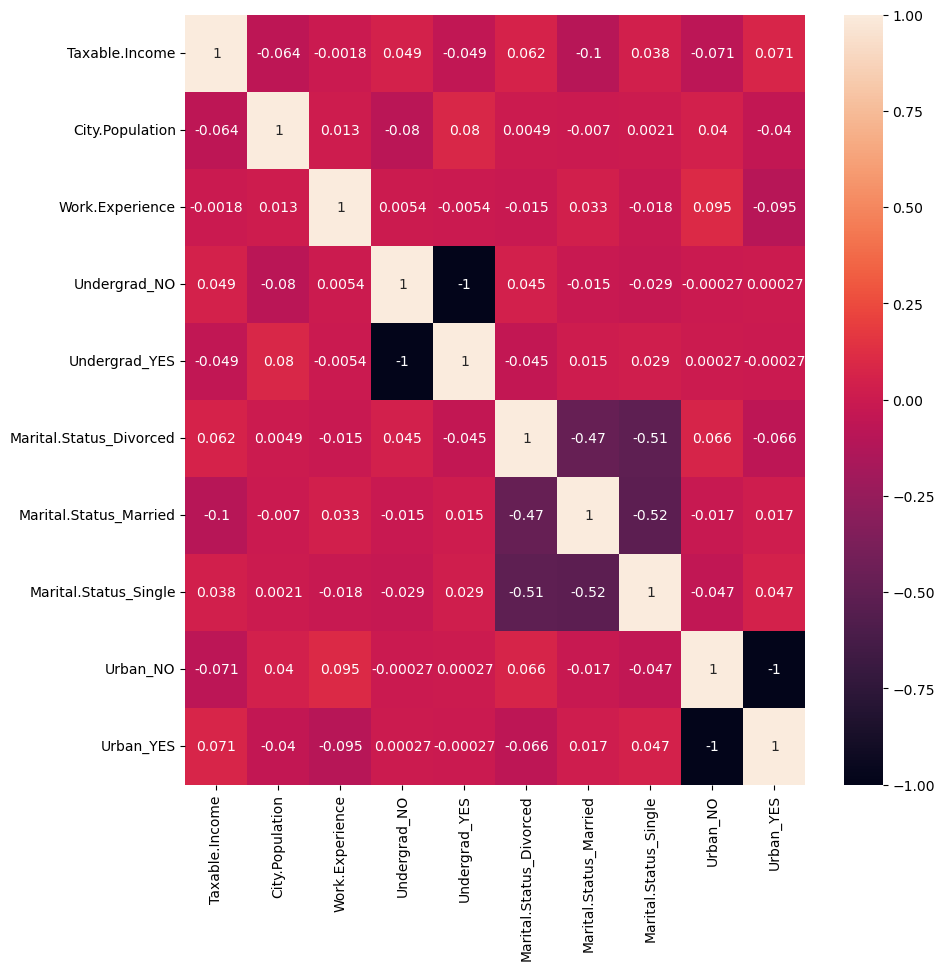

In [12]:
corr= df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

### Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [13]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [14]:
df1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,good,50047,10,True,False,False,False,True,False,True
1,good,134075,18,False,True,True,False,False,False,True
2,good,160205,30,True,False,False,True,False,False,True
3,good,193264,15,False,True,False,False,True,False,True
4,good,27533,28,True,False,False,True,False,True,False


In [15]:
# Model Building

In [16]:
x= df1.iloc[:,1:10]
y= df1.iloc[:,0]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=1)

In [18]:
y_train.value_counts()

Taxable.Income
good     379
risky    101
Name: count, dtype: int64

In [19]:
model= RandomForestClassifier() 
model.fit(x_train,y_train)


RandomForestClassifier()

In [20]:
pred_train= model.predict(x_train)

In [21]:
accuracy_score(y_train,pred_train)

1.0

In [22]:
confusion_matrix(y_train,pred_train)

array([[379,   0],
       [  0, 101]], dtype=int64)

In [23]:
y_pred= model.predict(x_test)

In [24]:
accuracy_score(y_test,y_pred)

0.7583333333333333

In [25]:
confusion_matrix(y_test,y_pred)

array([[91,  6],
       [23,  0]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        good       0.80      0.94      0.86        97
       risky       0.00      0.00      0.00        23

    accuracy                           0.76       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.76      0.70       120



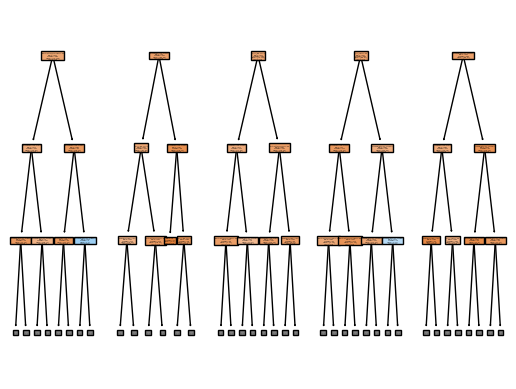

In [27]:
fig,ax = plt.subplots(1,5)

for i in range(0,5):
    tree.plot_tree(model.estimators_[i],
                  feature_names=list(x.columns),
                  class_names=list(df1['Taxable.Income'].unique()),
                  filled=True,
                   max_depth=2,
                  ax  = ax[i])

# Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 75%


In [28]:
model.feature_importances_

array([0.5226212 , 0.35199201, 0.01649269, 0.01703567, 0.0191058 ,
       0.01937424, 0.01892738, 0.01651137, 0.01793964])

In [29]:
fi= pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
0,City.Population,0.522621
1,Work.Experience,0.351992
5,Marital.Status_Married,0.019374
4,Marital.Status_Divorced,0.019106
6,Marital.Status_Single,0.018927
8,Urban_YES,0.017940
3,Undergrad_YES,0.017036
7,Urban_NO,0.016511
2,Undergrad_NO,0.016493


####  As seen in the above table city population is most important feature
 